# 2.1 Zeros of a function
Calculate the zeros of function $f(x) = \frac{x^3+3x^2-3}{x^2-x-1}$ with a precision of three decimals.

In [5]:
from math import *
%matplotlib inline
from numpy import *
import matplotlib.pylab as pyl

In [6]:
# Given quantities
E_f = 0.5E-3
def f(x):
    return (x**3+3*x**2-3)/(x**2-x-1)

We will use Newton's method. A first plot of the function gives us initial guesses of the zeros.

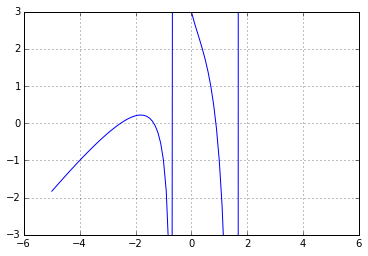

In [7]:
x = linspace(-5,5,101)
y = f(x)
pyl.figure()
pyl.plot(x,y)
pyl.ylim(-3,3)
pyl.grid()

In [8]:
# Initial guesses for zeros
x0_v = [-3.0,-1.5,1.0]

In [9]:
def fprime(x):
    return (-3-6*x**2-2*x**3+x**4)/(-1-x+x**2)**2

In [10]:
# Newton's method.
#
# @return (x0, h, i) - zero,
#                      last improvement of the zero (error),
#                      number of iterations
#
def newtons_method(x0, f, fprime, err, max_iter = 100):
    h = f(x0)/fprime(x0)
    x0 -= h
    i = 1
    while abs(h) > err and i < max_iter:
        h   = f(x0)/fprime(x0)
        x0 -= h
        i  += 1
    return (x0, h, i)

In [14]:
FMT_ITER='%13.6e | %13.6e | %13.6e'
FMT_HEAD='%13s | %13s | %13s'
FMT_LINE='-'*70

for x_0 in x0_v:
    print "Looking for zero with guess x_0 = %.2f" % x_0
    print FMT_LINE
    print FMT_HEAD % ("x_0", "e_i", "e_i/e_{i-1}")
    print FMT_LINE

    (r, h, i) = newtons_method(x_0, f, fprime, E_f/10.)
    (x_0, h, i) = newtons_method(x_0, f, fprime, E_f, 1)
    print FMT_ITER % (x_0, x_0-r, 0)
    while abs(h) > E_f:
        e_old = x_0 - r
        (x_0, h, i) = newtons_method(x_0, f, fprime, E_f, 1)
        print FMT_ITER % (x_0, h, (x_0-r)/e_old)

    print FMT_LINE
    if abs(h) <= E_f:
        print "Zero found at x = %.3f" % x_0
    print

Looking for zero with guess x_0 = -3.00
----------------------------------------------------------------------
          x_0 |           e_i |   e_i/e_{i-1}
----------------------------------------------------------------------
-2.576923e+00 | -4.483419e-02 |  0.000000e+00
-2.532789e+00 | -4.413430e-02 |  1.561057e-02
-2.532089e+00 | -6.997045e-04 |  2.612860e-04
-2.532089e+00 | -1.828708e-07 | -0.000000e+00
----------------------------------------------------------------------
Zero found at x = -2.532

Looking for zero with guess x_0 = -1.50
----------------------------------------------------------------------
          x_0 |           e_i |   e_i/e_{i-1}
----------------------------------------------------------------------
-1.280000e+00 |  6.729636e-02 |  0.000000e+00
-1.338648e+00 |  5.864783e-02 |  1.285140e-01
-1.347141e+00 |  8.493317e-03 |  1.794626e-02
-1.347296e+00 |  1.551580e-04 |  3.263870e-04
----------------------------------------------------------------------
Zero fou